In [1]:
%config Completer.use_jedi = False
import pandas as pd

In [2]:
df_bikes=pd.read_csv(r'D:\ML\4 bikes_analysis_linear_regression\bikes.csv')

In [3]:
df_bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [4]:
df_bikes.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

In [5]:
import seaborn as sns

<AxesSubplot:>

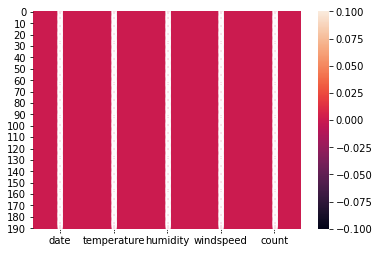

In [6]:
sns.heatmap(df_bikes.isnull(),annot=True)

In [7]:
df_bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [8]:
df_bikes.date=pd.to_datetime(df_bikes.date)

In [9]:
df_bikes['year']=df_bikes['date'].dt.year
df_bikes['month']=df_bikes['date'].dt.month_name()
df_bikes['day']=df_bikes['date'].dt.day_name()
df_bikes=df_bikes.drop(['date'],axis=1)

### lets make the barplot for average count during weekend and weekdays

In [10]:
import numpy as np

In [11]:
df_bikes['type_of_day']=np.where((df_bikes['day']=='Saturday') | (df_bikes['day']=='Sunday'),'Weekend','Weekday')

In [12]:
df_bikes['type_of_day']

0      Weekday
1      Weekday
2      Weekday
3      Weekday
4      Weekday
        ...   
186    Weekday
187    Weekend
188    Weekend
189    Weekday
190    Weekday
Name: type_of_day, Length: 191, dtype: object

<AxesSubplot:xlabel='type_of_day', ylabel='count'>

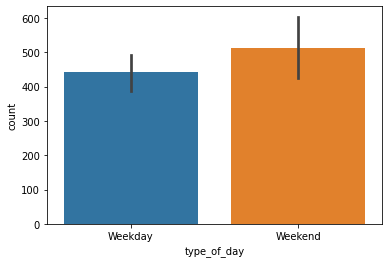

In [13]:
sns.barplot(x='type_of_day',y='count',data=df_bikes)

<AxesSubplot:xlabel='day', ylabel='count'>

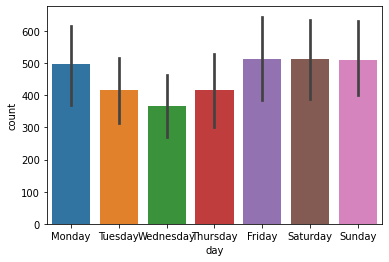

In [14]:
sns.barplot(x='day',y='count',data=df_bikes)

### average counts during months of an year

<AxesSubplot:xlabel='month', ylabel='count'>

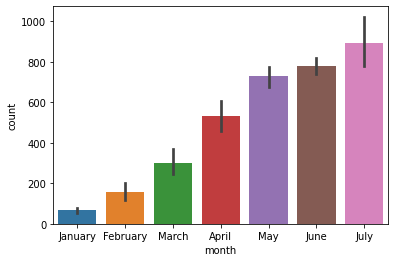

In [15]:
sns.barplot(x="month",y="count",data=df_bikes)

### using lineplot from seaborn to check how count varies with temprature

<AxesSubplot:xlabel='temperature', ylabel='count'>

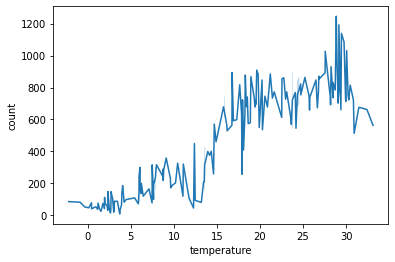

In [16]:
sns.lineplot(x="temperature",y="count",data=df_bikes)

### change with humidity

<AxesSubplot:xlabel='humidity', ylabel='count'>

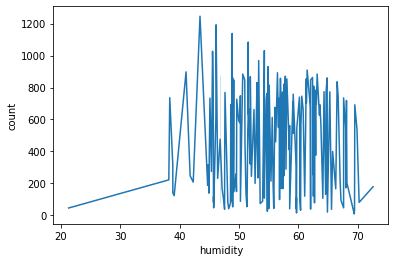

In [17]:
sns.lineplot(x="humidity",y="count",data=df_bikes)

### lets check the skewness of the dataset

In [18]:
df_bikes.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
count          0.153032
year           0.000000
dtype: float64

### change with windspeed

<AxesSubplot:xlabel='windspeed', ylabel='count'>

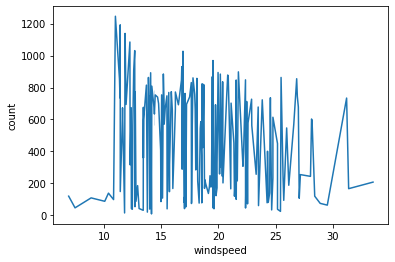

In [19]:
sns.lineplot(x="windspeed",y="count",data=df_bikes)

In [20]:
df_bikes

,temperature,humidity,windspeed,count,year,month,day,type_of_day
0,2.716070,45.715346,21.414957,120.000000,2011,January,Monday,Weekday
1,2.896673,54.267219,15.136882,108.000000,2011,January,Tuesday,Weekday
2,4.235654,45.697702,17.034578,82.000000,2011,January,Wednesday,Weekday
3,3.112643,50.237349,10.091568,88.000000,2011,January,Thursday,Weekday
4,2.723918,49.144928,15.738204,148.000000,2011,January,Friday,Weekday
...,...,...,...,...,...,...,...,...
186,28.187490,63.618656,19.761499,692.000000,2011,July,Friday,Weekday
187,29.070524,61.346450,21.121738,702.333333,2011,July,Saturday,Weekend
188,29.953558,59.074244,22.481976,712.666667,2011,July,Sunday,Weekend
189,30.836592,56.802038,23.842215,723.000000,2011,July,Monday,Weekday


In [21]:
df_x=df_bikes.drop(columns=['count','year','month','day','type_of_day'])
y=df_bikes['count']

### scaling the imput variable

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [23]:
x

,temperature,humidity,windspeed
0,-1.279380,-1.222633,0.557836
1,-1.261047,-0.150672,-0.688757
2,-1.125121,-1.224845,-0.311945
3,-1.239123,-0.655808,-1.690569
4,-1.278584,-0.792741,-0.569357
...,...,...,...
186,1.306332,1.021514,0.229520
187,1.395972,0.736697,0.499613
188,1.485613,0.451880,0.769706
189,1.575253,0.167063,1.039799


In [24]:
x.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
dtype: float64

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import median_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model

In [26]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r_state corresponding to ",r2_score," is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8432942289256724
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8070358686228429
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.7842161037383237
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8561235096423362
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8220943910877585
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8091937006132762
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8311527364686458
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8499680049830113
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.8844080169977218
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.7772607696333791
r_state corresponding to  <function r2_score at 0x000000001ACE0280>  is  0.84794

### Lets make our final model

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 88,test_size=0.20)
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

### Lets find the rmse and r2_score using sklearn.metrics 

In [28]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred) )
print("MSE is: ",mean_squared_error(y_test,y_pred))

RMSE is:  95.32465795102235
r2_score is:  0.9068265759551853
MSE is:  9086.790413479408


In [29]:
import pickle
pickle.dump(regr,open('bikes_linear_reg.pkl','wb'))

### lets use cross val score function to check above is overfitting or not

In [30]:
cross_val=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>